# Data Loading

In [565]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC

In [566]:
data =pd.read_csv("dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [567]:
data.shape

(7043, 21)

7043 different customers and 21 features

In [568]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [569]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no null value

In [570]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [571]:
def summarize_dataframe(df):
    summary = {}
    
    for column in df.columns:
        # Check if the column is continuous or categorical
        if pd.api.types.is_numeric_dtype(df[column]):
            summary[column] = {'type': 'Continuous', 'unique_values': None}
        else:
            # For categorical columns, get unique labels and their counts
            value_counts = df[column].value_counts()
            summary[column] = {'type': 'Categorical', 'unique_values': value_counts.to_dict()}
    
    return summary

# Get the summary of the DataFrame
df_summary = summarize_dataframe(data)

# Display the summary
for column, details in df_summary.items():
    print(f"Column: {column}")
    print(f"  Type: {details['type']}")
    if details['type'] == 'Categorical':
        print(f"  Unique Values and Counts: {details['unique_values']}")
    print()

Column: customerID
  Type: Categorical
  Unique Values and Counts: {'3186-AJIEK': 1, '7590-VHVEG': 1, '5575-GNVDE': 1, '8775-CEBBJ': 1, '2823-LKABH': 1, '7398-LXGYX': 1, '1035-IPQPU': 1, '7203-OYKCT': 1, '1699-HPSBG': 1, '9837-FWLCH': 1, '9710-NJERN': 1, '1122-JWTJW': 1, '4807-IZYOZ': 1, '1471-GIQKQ': 1, '0666-UXTJO': 1, '9053-EJUNL': 1, '1685-BQULA': 1, '6691-CCIHA': 1, '5482-NUPNA': 1, '3413-BMNZE': 1, '7310-EGVHZ': 1, '6827-IEAUQ': 1, '4929-XIHVW': 1, '3841-NFECX': 1, '8773-HHUOZ': 1, '5248-YGIJN': 1, '8665-UTDHZ': 1, '6467-CHFZW': 1, '6865-JZNKO': 1, '6322-HRPFA': 1, '3638-WEABW': 1, '1066-JKSGK': 1, '1680-VDCWW': 1, '8779-QRDMV': 1, '4183-MYFRB': 1, '8012-SOUDQ': 1, '2954-PIBKO': 1, '7639-LIAYI': 1, '7760-OYPDY': 1, '5948-UJZLF': 1, '3714-NTNFO': 1, '4080-IIARD': 1, '4671-VJLCL': 1, '9867-JCZSP': 1, '9489-DEDVP': 1, '8865-TNMNX': 1, '8168-UQWWF': 1, '5380-WJKOV': 1, '6572-ADKRS': 1, '6047-YHPVI': 1, '6234-RAAPL': 1, '8627-ZYGSZ': 1, '5122-CYFXA': 1, '5698-BQJOH': 1, '0557-ASKVU': 

1. Need to drop customerID 
2. senior citizen column is treated as continous as it is having 0 and 1 value but it is categorical feature
3. Total charges must be continous value not categorical

# Preprocessing of data

Drop Customer ID

In [572]:
data.drop(columns=['customerID'], inplace=True)
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Handling Total charges Feature

In [573]:
data["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      shape=(6531,), dtype=object)

checking all the  values can be converted to float or not

In [574]:
s=data["TotalCharges"]
non_float_indices = []

for i, val in enumerate(s):
    try:
        # Try converting each element to a float
        float(val)
    except ValueError:
        # If a ValueError occurs, the value is not a float
        non_float_indices.append(i)

print("Indices with non-float values:", non_float_indices)

Indices with non-float values: [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]


In [575]:
data = data.drop(non_float_indices)

# Resetting index if needed
data = data.reset_index(drop=True)

In [576]:
data.shape

(7032, 20)

In [577]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [578]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Label Encoding the dataset

In [579]:
categorical_columns = data.select_dtypes(include = "object").columns
encoders = {}

for column in categorical_columns:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    encoders[column] = {
        "encoder": label_encoder,
        "mapping": dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    }

# Print the mappings for each column
for column, info in encoders.items():
    print(f"Mapping for column '{column}':")
    for original, encoded in info["mapping"].items():
        print(f"  {original} -> {encoded}")

Mapping for column 'gender':
  Female -> 0
  Male -> 1
Mapping for column 'Partner':
  No -> 0
  Yes -> 1
Mapping for column 'Dependents':
  No -> 0
  Yes -> 1
Mapping for column 'PhoneService':
  No -> 0
  Yes -> 1
Mapping for column 'MultipleLines':
  No -> 0
  No phone service -> 1
  Yes -> 2
Mapping for column 'InternetService':
  DSL -> 0
  Fiber optic -> 1
  No -> 2
Mapping for column 'OnlineSecurity':
  No -> 0
  No internet service -> 1
  Yes -> 2
Mapping for column 'OnlineBackup':
  No -> 0
  No internet service -> 1
  Yes -> 2
Mapping for column 'DeviceProtection':
  No -> 0
  No internet service -> 1
  Yes -> 2
Mapping for column 'TechSupport':
  No -> 0
  No internet service -> 1
  Yes -> 2
Mapping for column 'StreamingTV':
  No -> 0
  No internet service -> 1
  Yes -> 2
Mapping for column 'StreamingMovies':
  No -> 0
  No internet service -> 1
  Yes -> 2
Mapping for column 'Contract':
  Month-to-month -> 0
  One year -> 1
  Two year -> 2
Mapping for column 'PaperlessBillin

In [580]:
data


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7028,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7029,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7030,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


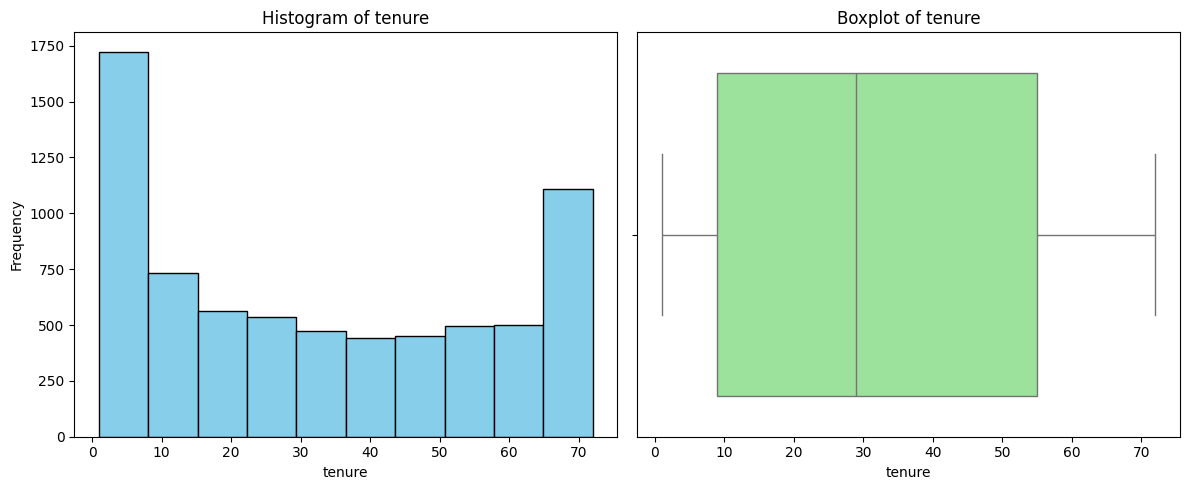

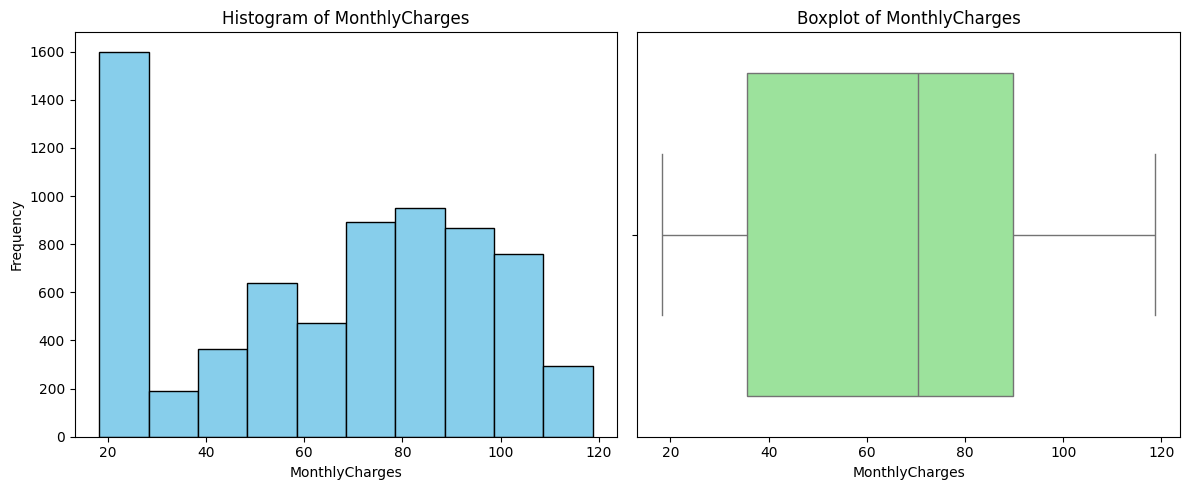

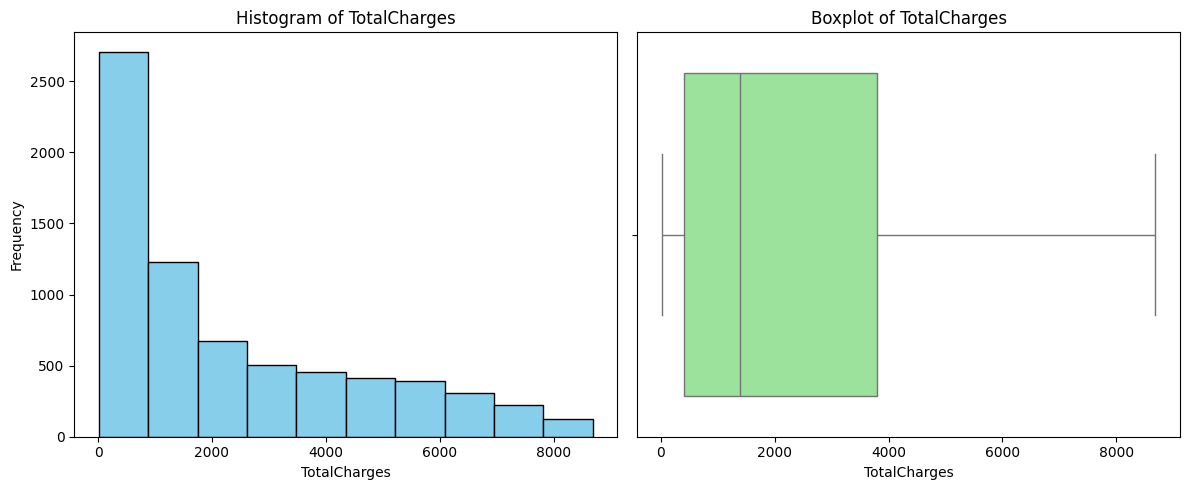

In [581]:
numerical_columns=["tenure","MonthlyCharges","TotalCharges"]
for column in numerical_columns:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(data[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column], color='lightgreen')
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()

There is no outliers

In [582]:
value_counts = data['Churn'].value_counts()
print(value_counts)

Churn
0    5163
1    1869
Name: count, dtype: int64


In [583]:
X = data.drop(columns=['Churn'])
y=data["Churn"]

In [584]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [585]:
smote_nc = SMOTENC(categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], random_state=42)  # Indices of categorical features

X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

In [586]:
X_train_resampled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,1,65,1,2,1,2,2,2,2,0,0,2,0,1,94.550000,6078.750000
1,1,0,0,0,26,0,1,0,0,0,2,2,0,0,0,0,2,35.750000,1022.500000
2,0,0,1,0,68,1,2,1,0,2,2,2,0,0,2,0,1,90.200000,6297.650000
3,1,0,0,0,3,1,0,1,0,2,0,0,0,2,0,0,2,84.300000,235.050000
4,0,0,1,0,49,0,1,0,2,0,0,0,2,0,0,0,0,40.650000,2070.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,0,1,0,0,13,1,0,1,0,0,0,0,0,0,0,1,0,79.053532,948.476699
8256,1,0,1,0,54,1,2,1,2,2,0,0,2,2,0,1,1,103.376066,5631.911196
8257,1,1,1,0,35,1,2,1,0,0,2,0,2,2,0,1,0,103.953120,3506.400467
8258,0,1,0,0,9,1,2,1,0,0,0,0,0,2,0,1,2,81.885525,733.209203


In [587]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the features and transform the data
X_scaled = scaler.fit_transform(X_train_resampled[numerical_columns]) 
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_columns)

In [588]:
X_scaled_df

,tenure,MonthlyCharges,TotalCharges
0,1.567120,0.917879,1.846409
1,-0.064470,-1.132746,-0.471148
2,1.692627,0.766174,1.946743
3,-1.026691,0.560414,-0.832079
4,0.897750,-0.961861,0.009323
...,...,...,...
8255,-0.608334,0.377446,-0.505077
8256,1.106928,1.225684,1.641598
8257,0.312050,1.245808,0.667360
8258,-0.775677,0.476210,-0.603745


In [589]:
X_train_resampled['tenure']=X_scaled_df['tenure']
X_train_resampled['MonthlyCharges']=X_scaled_df['MonthlyCharges']
X_train_resampled['TotalCharges']=X_scaled_df['TotalCharges']

In [590]:
X_train_resampled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,1,1.567120,1,2,1,2,2,2,2,0,0,2,0,1,0.917879,1.846409
1,1,0,0,0,-0.064470,0,1,0,0,0,2,2,0,0,0,0,2,-1.132746,-0.471148
2,0,0,1,0,1.692627,1,2,1,0,2,2,2,0,0,2,0,1,0.766174,1.946743
3,1,0,0,0,-1.026691,1,0,1,0,2,0,0,0,2,0,0,2,0.560414,-0.832079
4,0,0,1,0,0.897750,0,1,0,2,0,0,0,2,0,0,0,0,-0.961861,0.009323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,0,1,0,0,-0.608334,1,0,1,0,0,0,0,0,0,0,1,0,0.377446,-0.505077
8256,1,0,1,0,1.106928,1,2,1,2,2,0,0,2,2,0,1,1,1.225684,1.641598
8257,1,1,1,0,0.312050,1,2,1,0,0,2,0,2,2,0,1,0,1.245808,0.667360
8258,0,1,0,0,-0.775677,1,2,1,0,0,0,0,0,2,0,1,2,0.476210,-0.603745


In [591]:
correlation_matrix = X_train_resampled[numerical_columns].corr()

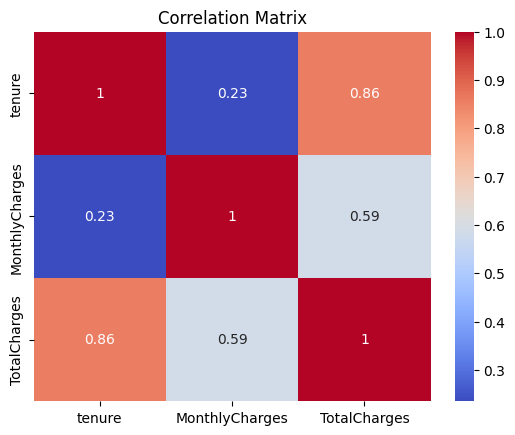

In [592]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

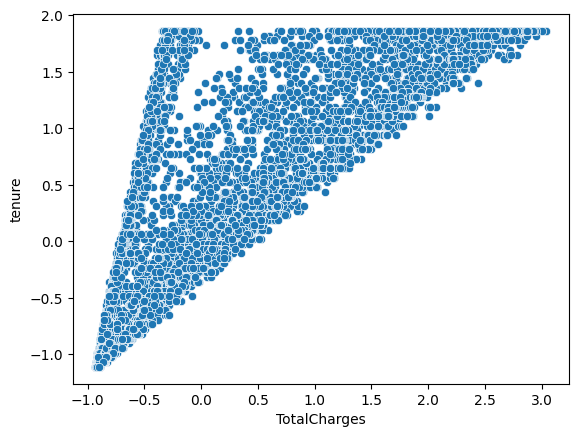

In [593]:
sns.scatterplot(x='TotalCharges', y='tenure', data=X_train_resampled)
plt.show()

In [594]:
pca = PCA(n_components=2)  # Reducing to 2 components
principal_components = pca.fit_transform(X_train_resampled[numerical_columns])

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(pc_df)

# Variance explained by each component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

           PC1       PC2
0     2.573122 -0.257076
1    -0.870349 -0.865948
2     2.644477 -0.460974
3    -0.902488  1.102138
4     0.093997 -1.292240
...        ...       ...
8255 -0.522030  0.691924
8256  2.306717  0.268995
8257  1.198518  0.807295
8258 -0.641071  0.874429
8259 -1.062673  1.038235

[8260 rows x 2 columns]
Explained Variance Ratio: [0.71926917 0.26091565]


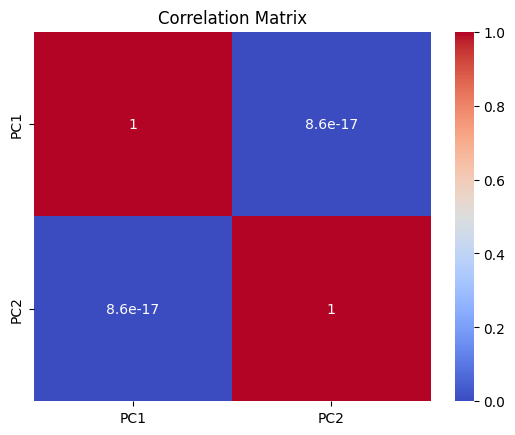

In [595]:
correlation_matrix1 = pc_df.corr()
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [596]:
categorical_columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod','SeniorCitizen']
d=X_train_resampled[categorical_columns]
X_train_final = pd.concat([d, pc_df], axis=1)

In [598]:
training_data=pd.concat([X_train_final,y_train_resampled],axis=1)
training_data

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,PC1,PC2,Churn
0,1,1,1,1,2,1,2,2,2,2,0,0,2,0,1,0,2.573122,-0.257076,0
1,1,0,0,0,1,0,0,0,2,2,0,0,0,0,2,0,-0.870349,-0.865948,0
2,0,1,0,1,2,1,0,2,2,2,0,0,2,0,1,0,2.644477,-0.460974,0
3,1,0,0,1,0,1,0,2,0,0,0,2,0,0,2,0,-0.902488,1.102138,0
4,0,1,0,0,1,0,2,0,0,0,2,0,0,0,0,0,0.093997,-1.292240,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8255,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,-0.522030,0.691924,1
8256,1,1,0,1,2,1,2,2,0,0,2,2,0,1,1,0,2.306717,0.268995,1
8257,1,1,0,1,2,1,0,0,2,0,2,2,0,1,0,1,1.198518,0.807295,1
8258,0,0,0,1,2,1,0,0,0,0,0,2,0,1,2,1,-0.641071,0.874429,1


In [599]:
training_data.to_csv('training_data.csv', index=False)

In [601]:
X_scaled_test=scaler.transform(X_test[numerical_columns])
X_scaled_df = pd.DataFrame(X_scaled_test,columns=numerical_columns, index=X_test.index)
X_test[numerical_columns] = X_scaled_df
pc_df_test=pca.transform(X_test[numerical_columns])

pc_df_test = pd.DataFrame(data=pc_df_test, columns=['PC1', 'PC2'])

d=X_test[categorical_columns]
d=d.set_index(pc_df_test.index)
X_test_final = pd.concat([d, pc_df_test], axis=1)


In [613]:
y_test=pd.DataFrame(y_test)
y_test=y_test.set_index(pc_df_test.index)

In [616]:
testing_data=pd.concat([X_test_final,y_test],axis=1)
testing_data.to_csv("testing_data.csv",index=False)

In [617]:
testing_data

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,PC1,PC2,Churn
0,0,1,1,1,0,0,0,2,0,2,2,2,2,1,1,0,1.658949,-0.597051,0
1,0,0,0,1,2,1,0,2,0,0,0,0,0,1,0,0,-0.807764,0.831889,0
2,0,0,0,1,0,2,1,1,1,1,1,1,2,0,3,0,-0.414052,-1.962604,0
3,0,0,0,1,0,2,1,1,1,1,1,1,0,0,3,0,-2.002236,-0.715730,1
4,0,1,0,1,2,1,0,2,2,0,2,2,2,1,0,0,3.341310,-0.146996,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,-1.219453,-0.256909,0
1403,0,0,1,0,1,0,2,0,0,2,0,2,0,0,3,0,-0.671984,-0.579154,0
1404,1,0,0,1,0,2,1,1,1,1,1,1,1,1,3,0,-1.987440,-0.774690,0
1405,1,0,0,0,1,0,2,2,0,2,0,0,2,1,3,0,-0.410646,-0.993004,0
